<a href="https://colab.research.google.com/github/Thames07/Apply-Uniabuja_Student_Alcholic_Consumption/blob/main/Reinforcement_learning_for_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Install and Import dependencies


In [1]:
!pip3 install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5 MB 7.9 kB/s 
     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 240 kB 62.2 MB/s 
     |████████████████████████████████| 171 kB 66.7 MB/s 
     |████████████████████████████████| 503 kB 63.5 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 3.8 MB 44.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=7194633dcbd863ff9b31bf0838112a49e9c29389d828e1d2a5b48b6a58bccaf9
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorb

In [ ]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

1. Bring in Marketwatch GME Data


In [4]:
data = pd.read_csv('/content/drive/MyDrive/gmedata.csv')

data

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.50,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.00,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.00,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.90,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.50,"63,565,621"
...,...,...,...,...,...,...
246,03/20/2020,4.08,4.08,3.65,3.76,"7,722,194"
247,03/19/2020,3.71,4.20,3.55,4.19,"5,039,539"
248,03/18/2020,4.10,4.25,3.50,3.77,"3,651,709"
249,03/17/2020,4.40,4.65,4.11,4.23,"3,562,210"


In [5]:
data.head(10)

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.50,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.00,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.00,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.90,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.50,"63,565,621"
5,03/05/2021,128.17,151.53,127.50,137.74,"30,733,670"
6,03/04/2021,125.00,147.87,115.30,132.35,"32,606,891"
7,03/03/2021,122.51,127.75,113.12,124.18,"19,273,881"
8,03/02/2021,116.93,133.20,112.20,118.18,"33,783,039"
9,03/01/2021,104.54,133.99,99.97,120.40,"49,793,969"


In [6]:
data.tail()

,Date,Open,High,Low,Close,Volume
246,03/20/2020,4.08,4.08,3.65,3.76,"7,722,194"
247,03/19/2020,3.71,4.20,3.55,4.19,"5,039,539"
248,03/18/2020,4.10,4.25,3.50,3.77,"3,651,709"
249,03/17/2020,4.40,4.65,4.11,4.23,"3,562,210"
250,03/16/2020,3.93,4.57,3.90,4.37,"4,866,696"


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [9]:
data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [13]:
env = gym.make('stocks-v0', df=data, frame_bound=(5,100), window_size=5)

In [14]:
env.signal_features

array([[ 2.6450e+02,  0.0000e+00],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,

2. Build **Environment**

In [15]:
env.action_space

Discrete(2)

info {'total_reward': -124.86999999999998, 'total_profit': 0.20887282312290645, 'position': 0}


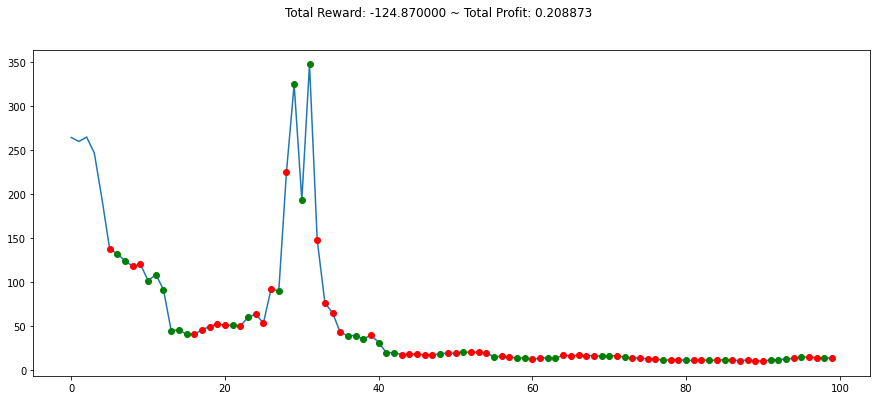

In [16]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

3. Build Environment and **Train**

In [17]:
env_maker = lambda: gym.make('stocks-v0', df=data, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [18]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
---------------------------------
| explained_variance | -270     |
| fps                | 377      |
| nupdates           | 137600   |
| policy_entropy     | 0.00056  |
| total_timesteps    | 688000   |
| value_loss         | 6        |
---------------------------------
---------------------------------
| explained_variance | -85.4    |
| fps                | 377      |
| nupdates           | 137700   |
| policy_entropy     | 2.86e-05 |
| total_timesteps    | 688500   |
| value_loss         | 0.00118  |
---------------------------------
---------------------------------
| explained_variance | -54.2    |
| fps                | 377      |
| nupdates           | 137800   |
| policy_entropy     | 2.18e-05 |
| total_timesteps    | 689000   |
| value_loss         | 0.000748 |
---------------------------------
---------------------------------
| explained_variance | -64.8    |
| fps                | 377      |
| nupdates           | 137900  

4. **Evaluation**

In [19]:
env = gym.make('stocks-v0', df=data, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.7883733502538072, 'position': 1}


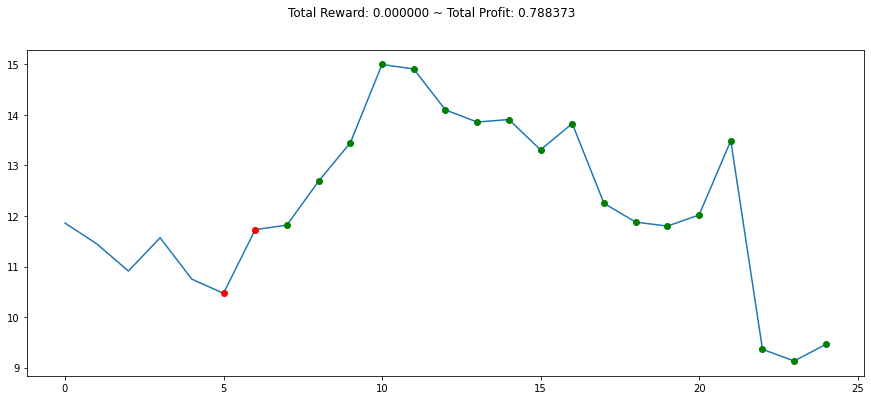

In [20]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [21]:
data.describe()

,Open,High,Low,Close
count,251.000000,251.000000,251.000000,251.000000
mean,25.990159,30.273147,21.653705,25.202430
std,56.013581,67.855236,42.129515,52.233714
min,2.850000,2.940000,2.570000,2.800000
25%,4.485000,4.700000,4.320000,4.440000
50%,7.780000,8.050000,7.170000,7.700000
75%,15.740000,16.495000,15.230000,15.715000
max,379.710000,483.000000,262.270000,347.510000
